In [1]:
from os.path import exists

pr_path = '/work/kajiyama/cnn/input/pr/main/pr_coarse_std.npy'
sep_path = '/work/kajiyama/cnn/input/pr/one/1x1/pr_1x1_std_Sep_one.npy'
mjjaso_path = '/work/kajiyama/cnn/input/pr/thailand/5x5/pr_5x5_coarse_std_MJJASO_thailand.npy'

path_list = [pr_path, sep_path, mjjaso_path]
for i in path_list:
    print(exists(i))

True
True
True


In [2]:
import numpy as np
pr = np.load(pr_path) #pr[42, 165, 12, 24, 72]
sep = np.load(sep_path) #sep[42, 165]
mjjaso = np.load(mjjaso_path) #mjjaso[42, 165, 4, 4]

inp = [sep[i] for i in range(len(sep))]
y_train = sep.reshape(42*165)

In [3]:
import matplotlib.pyplot as plt

def draw_box(inp):
    fig = plt.figure(figsize =(15, 7))

    ax = plt.subplot(111)
    bp = ax.boxplot(inp)
    ax.set_ylim(-1.8, 1.8)

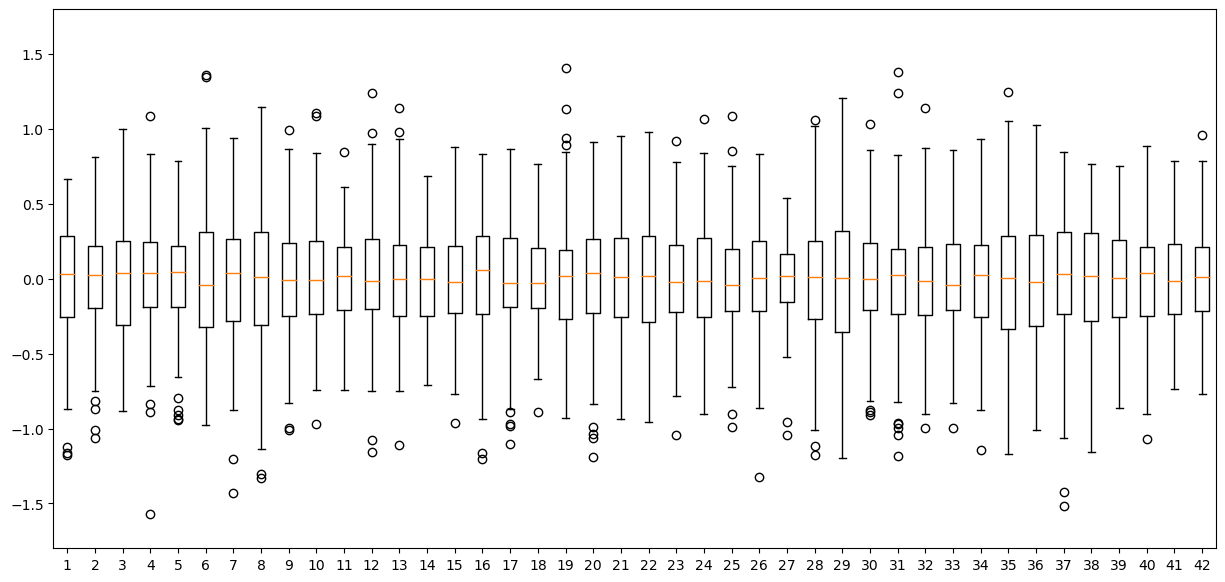

In [4]:
draw_box(inp)

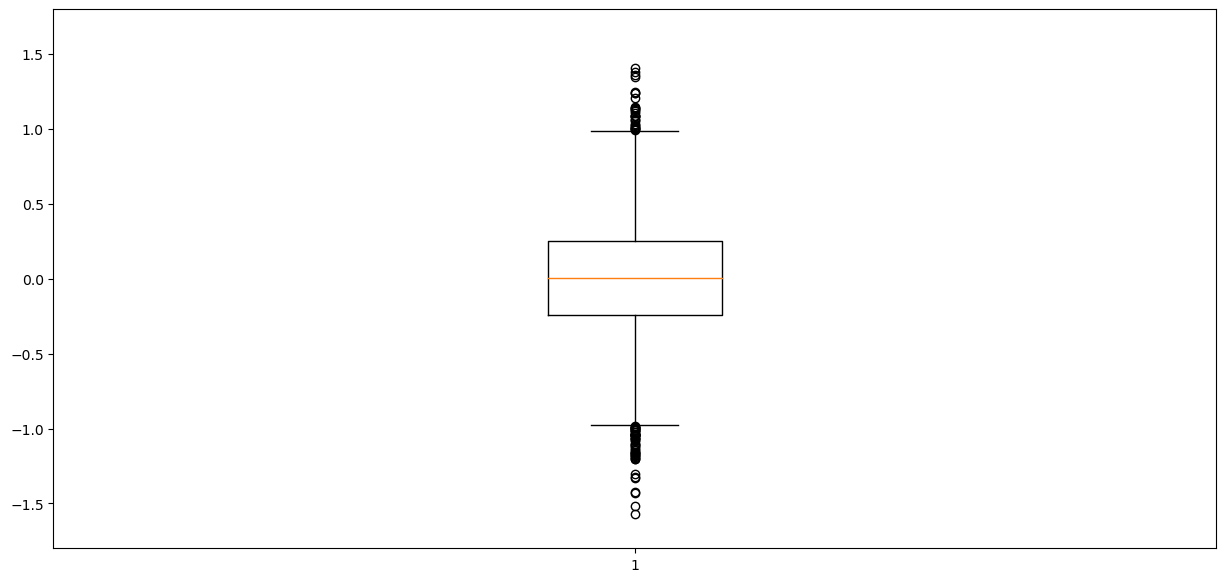

In [5]:
draw_box(y_train)

In [6]:
import seaborn as sns

def draw_hist(y_train):
    plt.style.use('fivethirtyeight')
    fig = plt.figure()
    ax = plt.subplot()
    ax.hist(y_train, bins=100, alpha=.5, color='darkcyan')
    
    ax2 = ax.twinx()
    sns.kdeplot(data=y_train, ax=ax2, color='sandybrown')

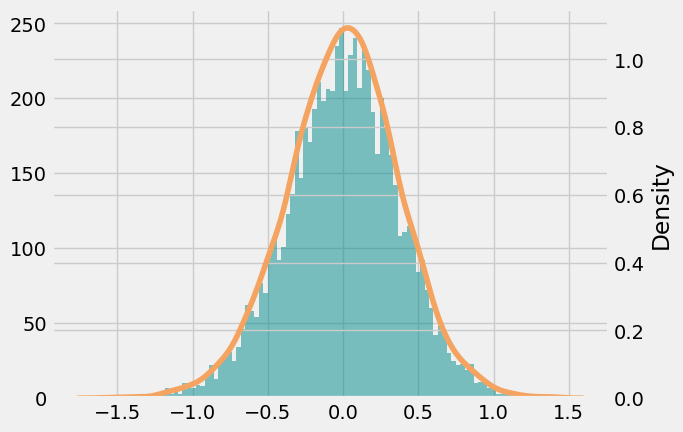

In [7]:
draw_hist(y_train)

In [41]:
def thailand_hist(data): # data=(165, 4, 4)
    row, column = 4, 4
    fig = plt.figure(figsize=(30,30))
    fig.suptitle('histgram of MJJASO average rainfall at each grid')
    
    t = 0
    for i in range(row):
        for j in range(column):
            t += 1
            ax = fig.add_subplot(row, column, t)
            rain = data[:, i, j]
            ax.hist(rain, bins= 10, alpha=.5, color='darkcyan')
            #ax.axvline(x=1, ymin=0, ymax=45, color='salmon')
            ax.set_xlim(-1.5, 1.5)
            ax.set_ylim(0, 45)
            
            ax2 = ax.twinx()
            sns.kdeplot(data=rain, ax=ax2, color='sandybrown')
    plt.show()

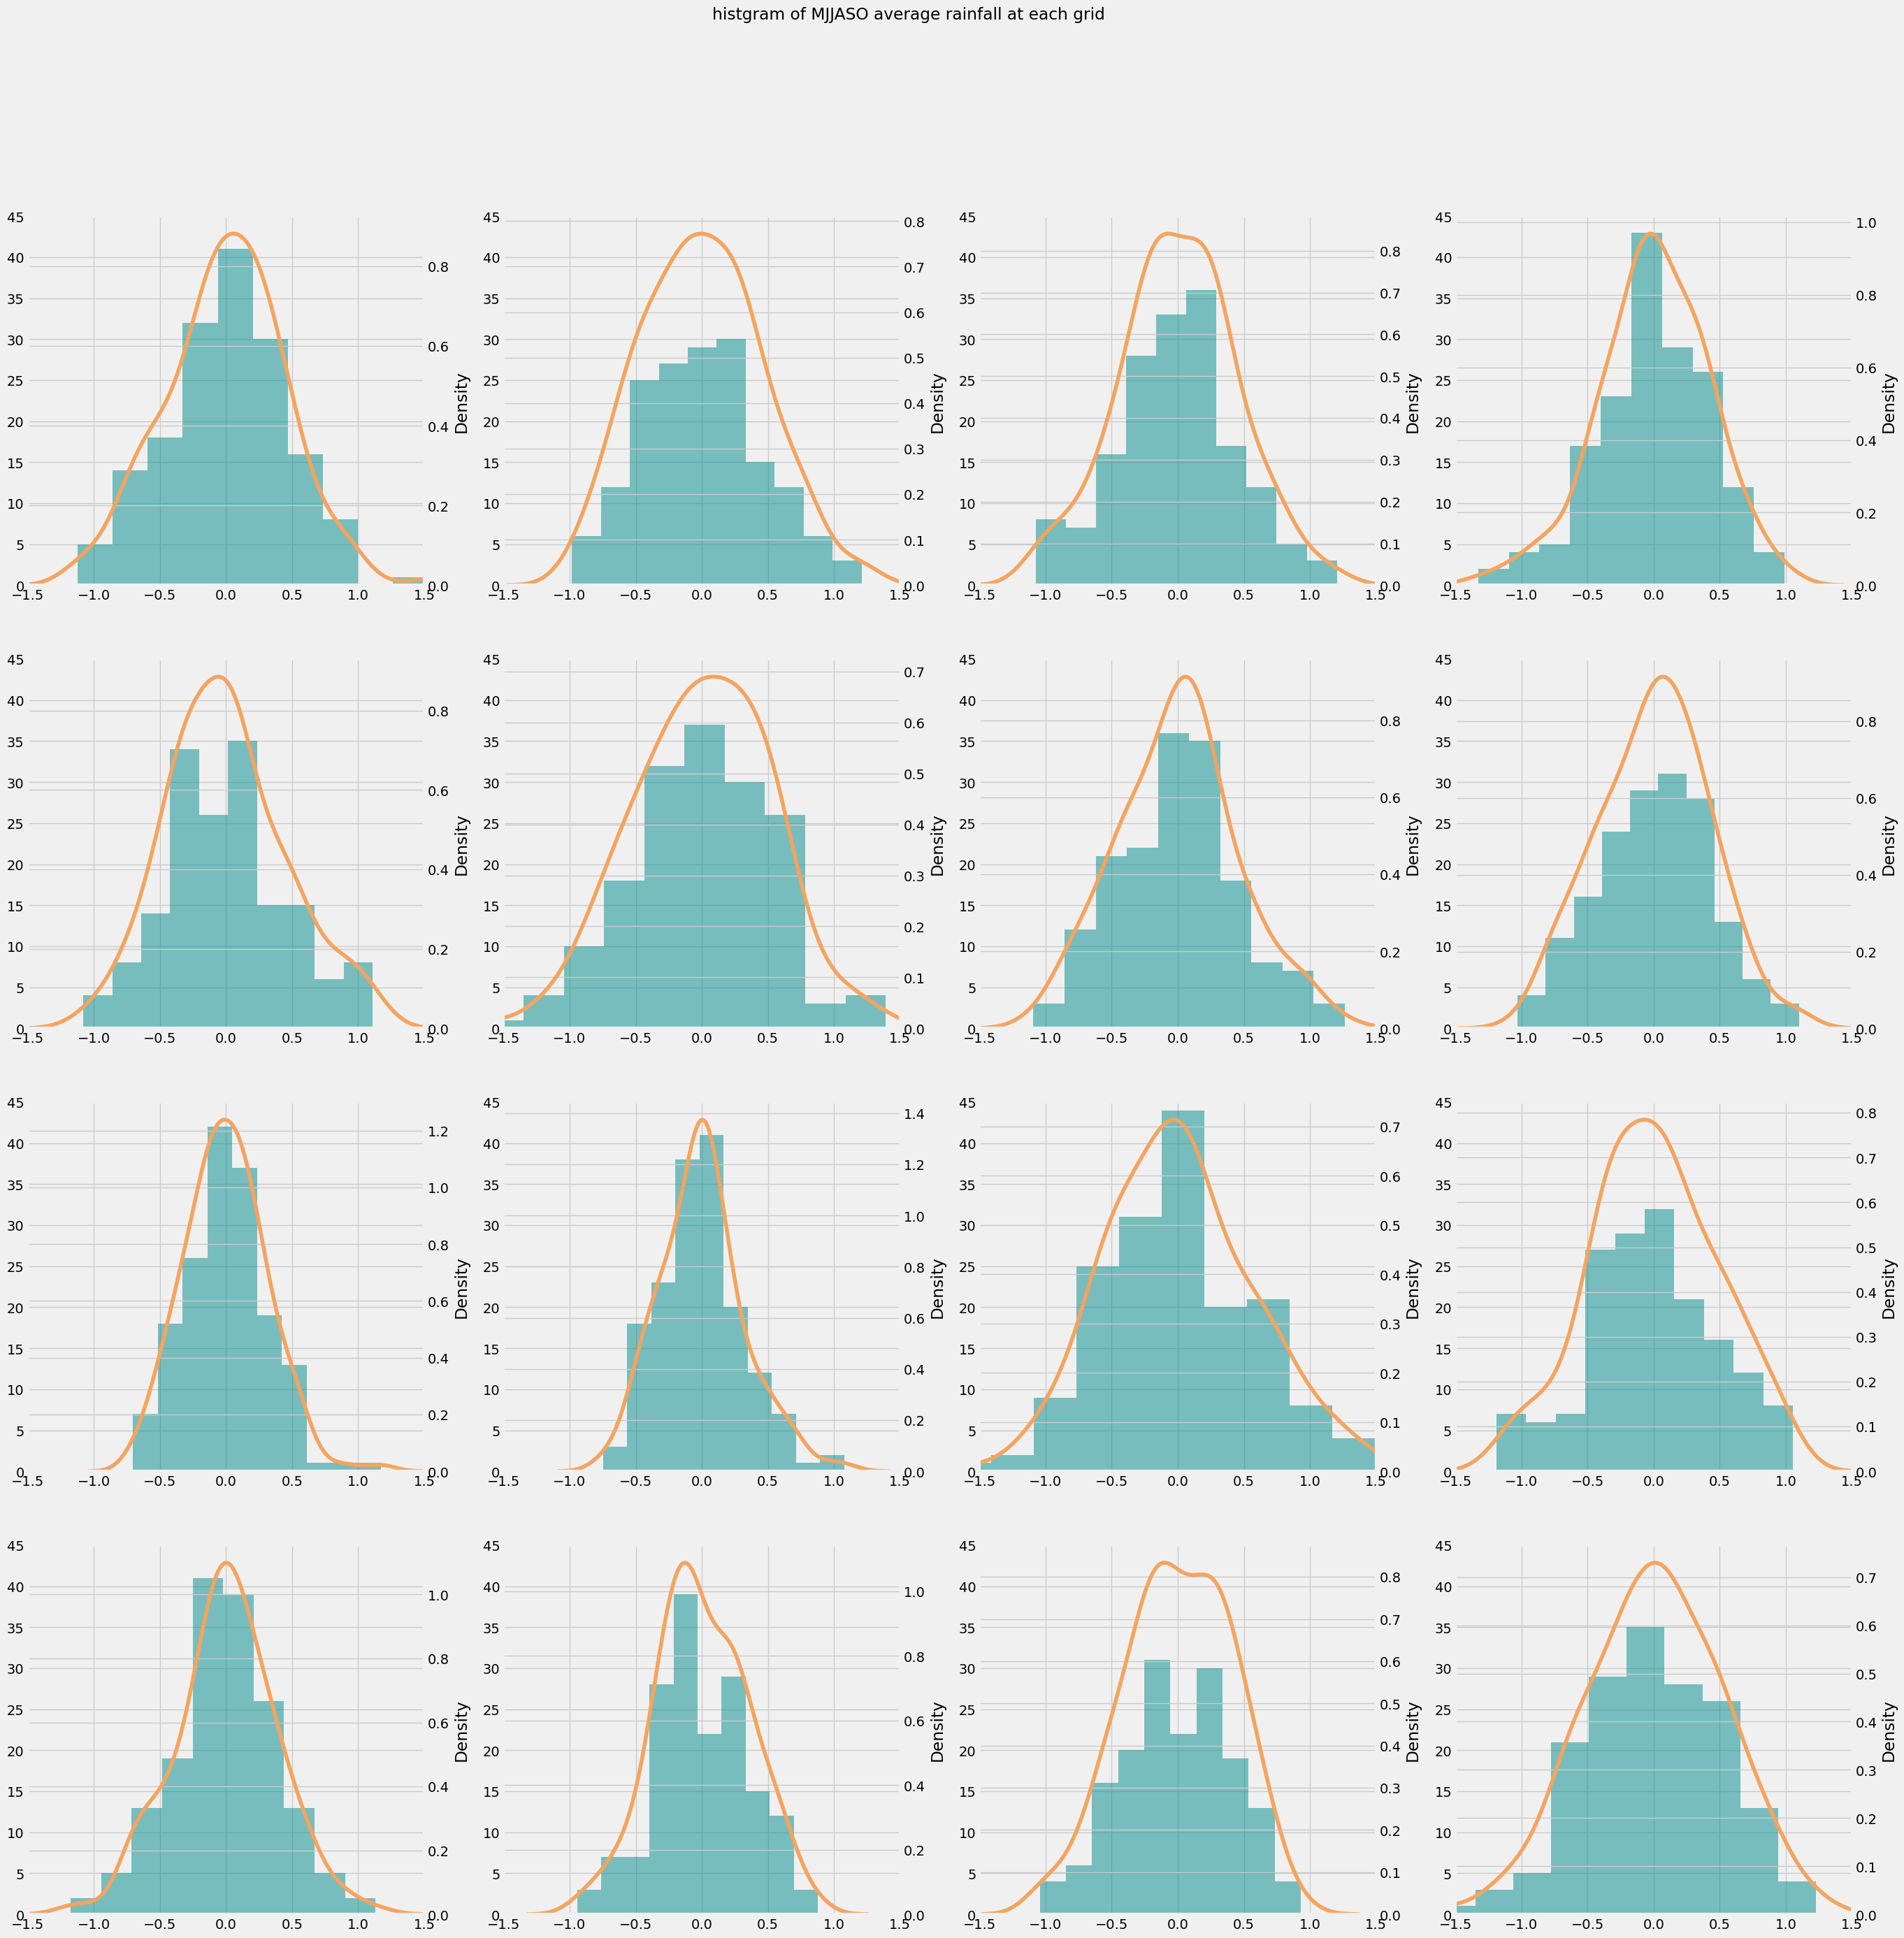

In [42]:
thailand_hist(mjjaso[0])

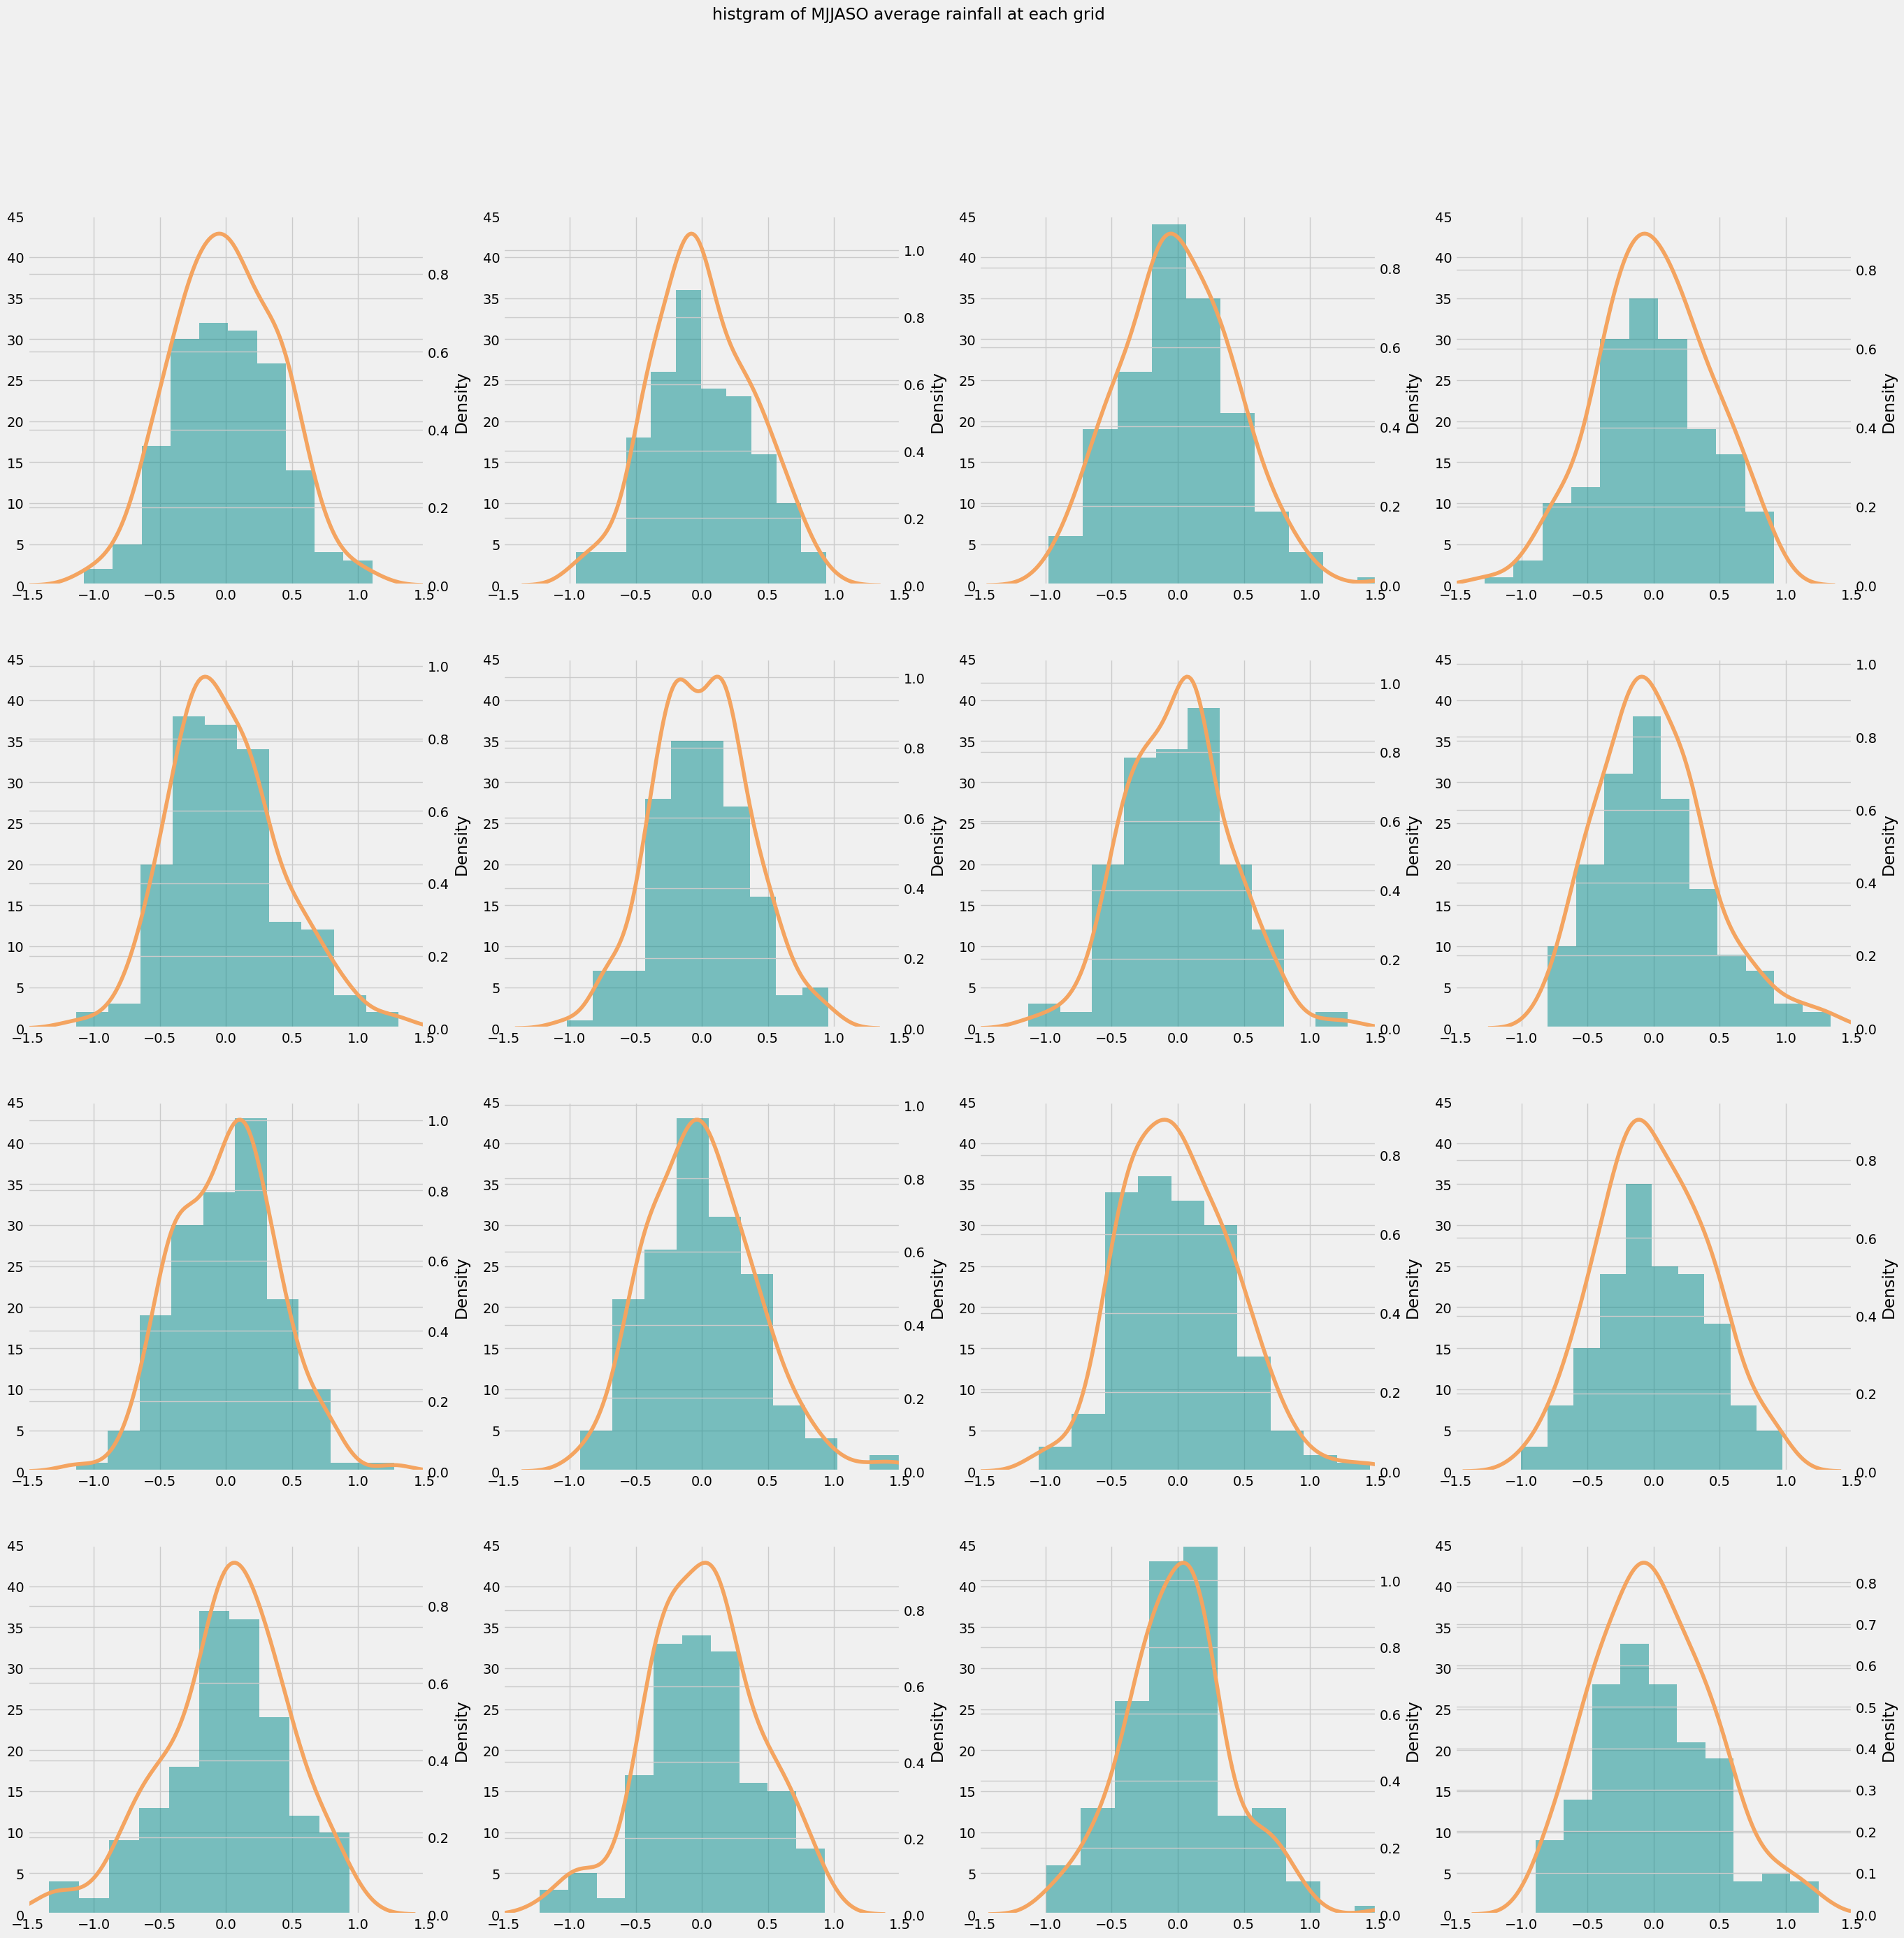

In [43]:
thailand_hist(mjjaso[10])